In [573]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from astropy.time import Time
std_df = []
uma_df = []

xlim_uma = [1050,1250]
ylim_uma = [785,985]
colour = 'Blue'
period_uma = 0.46805905525592434
path_uma = '/Volumes/maxdrive/AstroData/RVUMaTables/{}/'.format(colour) #PATH TO STAT TABLE FOLDER

In [574]:
def phase(jd, period):
        ph = ((jd - jd.min())/period) % 1
        return(ph)

In [575]:
def dfgenerator(path, flist, xlim, ylim, period):
    merge_df = []
    dfs = []
    for file in flist:

        df = pd.read_csv(file)
        df['OBS-TIME'] = pd.to_datetime(df['OBS-TIME'])
        exptime_min = df['EXP-TIME'].min()

        x_min, x_max = xlim[0], xlim[1]
        y_min, y_max = ylim[0], ylim[1]



        # filter rows based on x and y range
        mask = (df['x'].between(x_min, x_max)) & (df['y'].between(y_min, y_max))
        subset_df = df[mask]
        if len(subset_df) == 0:
            break
        if len(subset_df) > 1:
            idxmax = subset_df['Sum with bkg subtraction'].idxmax()
            subset_df = subset_df.loc[idxmax]
    
        
            
        dfs.append(subset_df)

    merge_df = pd.concat(dfs, ignore_index=True)
    merge_df['Sum with bkg subtraction'] *= (exptime_min/merge_df['EXP-TIME'])
    merge_df['OBS-TIME'] = pd.to_datetime(merge_df['OBS-TIME'])
    merge_df['JulianDate'] = Time(merge_df['OBS-TIME']).jd


    merge_df['phase'] = phase(merge_df['JulianDate'], period)
    merge_df = merge_df.dropna(subset=['Aperture Area (pixels)'])
    return (merge_df)

In [576]:
flist = sorted(glob.glob(path_uma+'aligned_Reduced_*2022*.csv'))
uma_df = dfgenerator(path_uma, flist_uma, xlim_uma, ylim_uma, period = period_uma)
uma_df['mag'] = -2.5*np.log10(uma_df['Sum with bkg subtraction'])

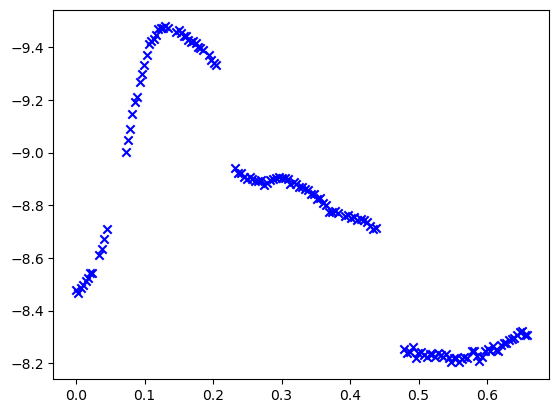

In [577]:
plt.scatter((uma_df['phase']), uma_df['mag'], color = 'blue', marker = 'x')
plt.gca().invert_yaxis()

In [578]:
path_std = path_uma
flist_std = flist_uma
xlim_std = [200,400]
ylim_std = [400,600]
period_uma = 0.468062
std_df = dfgenerator(path_std, flist_std, xlim_std, ylim_std, period = period_uma)
meanFlux = std_df['Sum with bkg subtraction'].mean()
std_df['residual'] = meanFlux - std_df['Sum with bkg subtraction']
std_df['residualFactor'] = (std_df['residual'])/(std_df['Sum with bkg subtraction'])

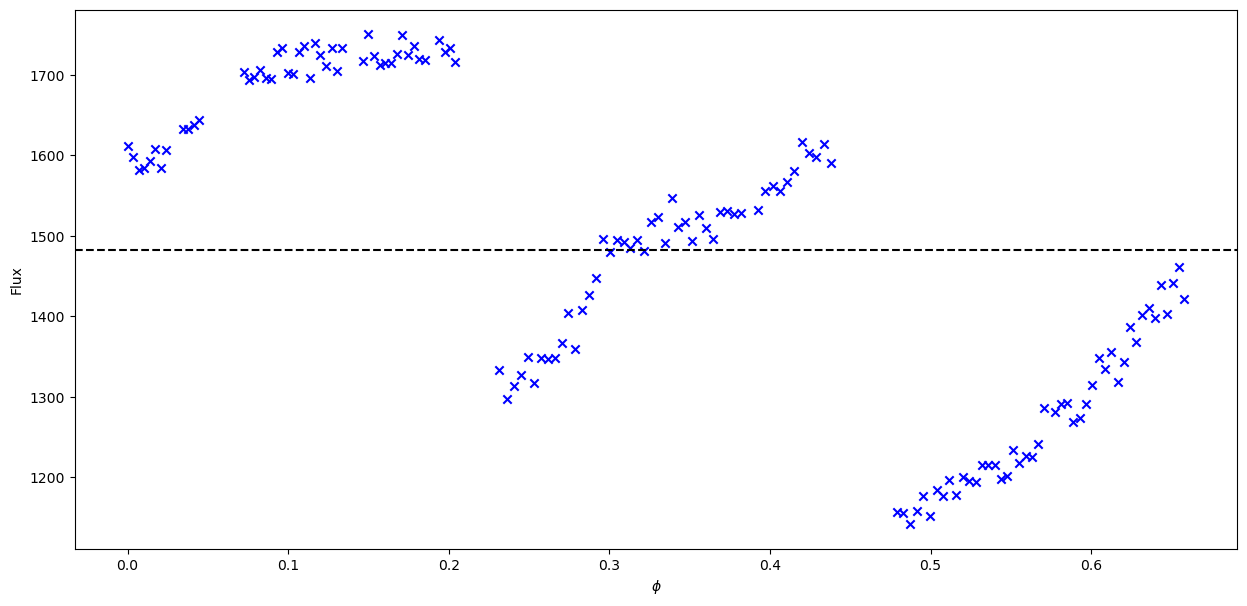

In [579]:
fig2 = plt.figure(figsize = (15,7))
plt.scatter((std_df['phase']), std_df['Sum with bkg subtraction'], color = 'blue', marker = 'x')
plt.axhline(y=meanFlux, color='black', linestyle='--')
plt.xlabel("$\phi$")
plt.ylabel("Flux")
plt.show()

In [580]:
newdf = pd.merge(uma_df, std_df[['residualFactor', 'OBS-TIME']], on='OBS-TIME')

In [581]:
newdf['correctedflux'] = (newdf['Sum with bkg subtraction']*(1+newdf['residualFactor']))

Text(0.5, 0, '$\\phi$')

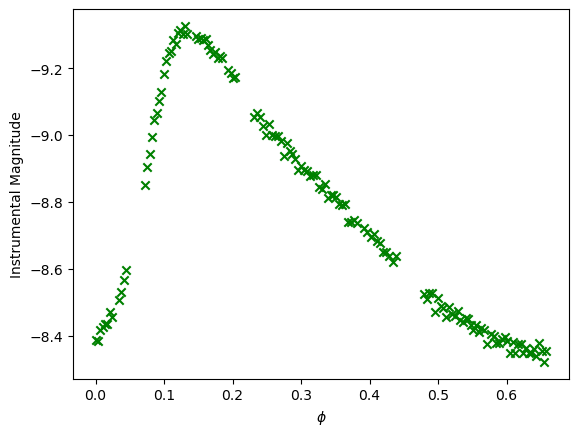

In [582]:
newdf['mag'] = -2.5*np.log10(newdf['correctedflux'])
plt.scatter(newdf['phase'], newdf['mag'], marker = 'x', color = 'green')
plt.gca().invert_yaxis()
plt.ylabel('Instrumental Magnitude')
plt.xlabel('$\phi$')

In [583]:
xlim_uma_2023 = [1070,1270]
ylim_uma_2023 = [820, 1020]

flist_uma_2023 = sorted(glob.glob(path_uma+'aligned_Reduced_*2023*.csv'))
period_uma = 0.468062
uma_2023_df = dfgenerator(path_uma, flist_uma_2023, xlim_uma_2023, ylim_uma_2023, period = period_uma)
uma_2023_df['mag'] = -2.5*np.log10(uma_2023_df['Sum with bkg subtraction'])

In [584]:
path_std_2023 = path_uma
flist_std_2023 = flist_uma_2023
xlim_std_2023 = [1940,2140]
ylim_std_2023 = [300,500]
period_uma = 0.468062
std_df_2023 = dfgenerator(path_std_2023, flist_std_2023, xlim_std_2023, ylim_std_2023, period = period_uma)
meanFlux = std_df_2023['Sum with bkg subtraction'].mean()
std_df_2023['residual'] = meanFlux - std_df_2023['Sum with bkg subtraction']
std_df_2023['residualFactor'] = (std_df_2023['residual'])/(std_df_2023['Sum with bkg subtraction'])

In [585]:
uma_2023_df

,Unnamed: 0,id,x,y,Aperture Sum,Median Flux Background Subtracted,Aperture Area (pixels),Sum with bkg subtraction,EXP-TIME,OBS-TIME,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,JulianDate,phase,mag
0,19,19,1166.478056,901.587777,5932.061823,0.188809,1385.44236,8016.172559,30.0,2023-02-23 20:48:22.268,NaN,NaN,NaN,2.459999e+06,0.000000,-9.759918
1,21,21,1166.480658,901.506097,5870.486865,0.161668,1385.44236,7903.706689,30.0,2023-02-23 20:50:33.867,NaN,NaN,NaN,2.459999e+06,0.003254,-9.744577
2,21,21,1166.256783,901.531560,5471.053171,0.148891,1385.44236,3679.841215,60.0,2023-02-23 20:55:10.782,21.0,21.0,21.0,2.459999e+06,0.010102,-8.914573
3,16,16,1173.245667,937.160221,7988.135380,0.141338,1385.44236,2623.011240,60.0,2023-04-03 21:05:40.729,NaN,NaN,NaN,2.460038e+06,0.347974,-8.547000
4,21,21,1166.262438,901.575400,5591.453872,0.141263,1385.44236,3835.699271,60.0,2023-02-23 20:59:10.794,21.0,21.0,21.0,2.459999e+06,0.016037,-8.959611
5,19,19,1173.300431,937.199330,7840.830657,0.136552,1385.44236,2684.148290,60.0,2023-04-03 21:18:43.734,NaN,NaN,NaN,2.460038e+06,0.367335,-8.572016
6,21,21,1166.381269,901.534104,5470.844249,0.144106,1385.44236,3750.310579,60.0,2023-02-23 21:03:11.975,21.0,21.0,21.0,2.459999e+06,0.022000,-8.935168
7,18,18,1173.193094,937.194303,7617.588038,0.138669,1385.44236,2701.632121,60.0,2023-04-03 21:31:51.390,NaN,NaN,NaN,2.460038e+06,0.386812,-8.579066
8,22,22,1166.364015,901.463699,5447.798925,0.145164,1385.44236,3750.864708,60.0,2023-02-23 21:07:13.544,22.0,22.0,22.0,2.459999e+06,0.027974,-8.935328
9,20,20,1173.243564,937.187854,7498.565739,0.124608,1385.44236,2685.280044,60.0,2023-04-03 21:45:04.901,NaN,NaN,NaN,2.460038e+06,0.406434,-8.572474


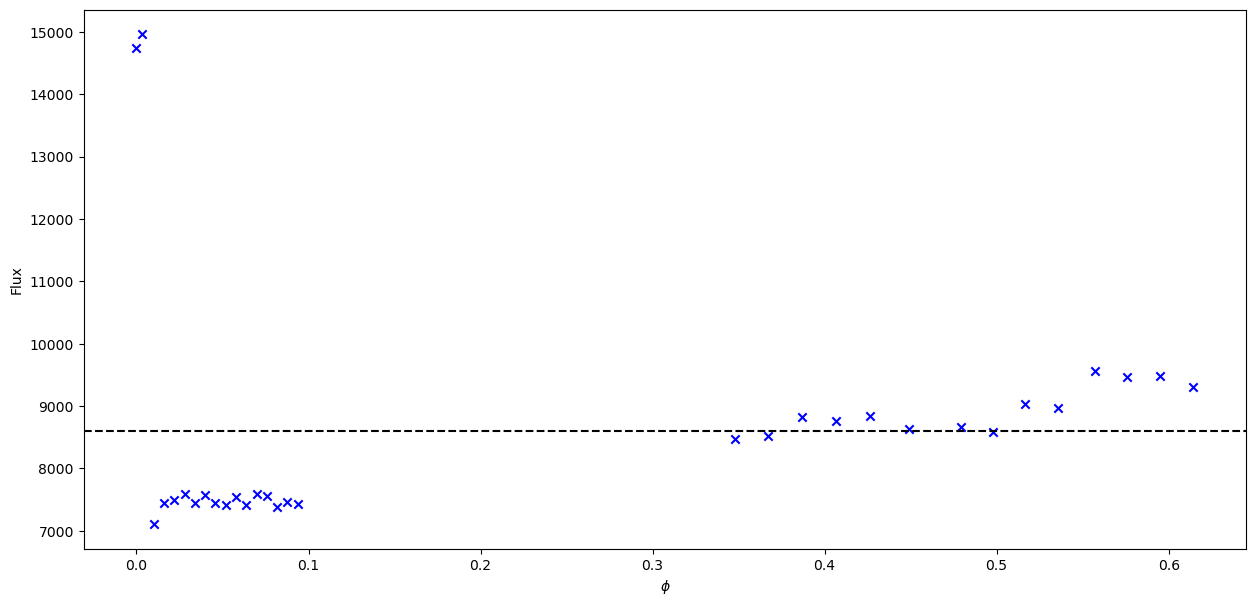

In [586]:
fig2 = plt.figure(figsize = (15,7))
plt.scatter((std_df_2023['phase']), std_df_2023['Sum with bkg subtraction'], color = 'blue', marker = 'x')
plt.axhline(y=meanFlux, color='black', linestyle='--')
plt.xlabel("$\phi$")
plt.ylabel("Flux")
plt.show()

In [587]:
newdf_2023 = pd.merge(uma_2023_df, std_df_2023[['residualFactor', 'OBS-TIME']], on='OBS-TIME')

In [588]:
newdf_2023

,Unnamed: 0,id,x,y,Aperture Sum,Median Flux Background Subtracted,Aperture Area (pixels),Sum with bkg subtraction,EXP-TIME,OBS-TIME,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,JulianDate,phase,mag,residualFactor
0,19,19,1166.478056,901.587777,5932.061823,0.188809,1385.44236,8016.172559,30.0,2023-02-23 20:48:22.268,NaN,NaN,NaN,2.459999e+06,0.000000,-9.759918,-0.415984
1,21,21,1166.480658,901.506097,5870.486865,0.161668,1385.44236,7903.706689,30.0,2023-02-23 20:50:33.867,NaN,NaN,NaN,2.459999e+06,0.003254,-9.744577,-0.424849
2,21,21,1166.256783,901.531560,5471.053171,0.148891,1385.44236,3679.841215,60.0,2023-02-23 20:55:10.782,21.0,21.0,21.0,2.459999e+06,0.010102,-8.914573,0.210978
3,16,16,1173.245667,937.160221,7988.135380,0.141338,1385.44236,2623.011240,60.0,2023-04-03 21:05:40.729,NaN,NaN,NaN,2.460038e+06,0.347974,-8.547000,0.016011
4,21,21,1166.262438,901.575400,5591.453872,0.141263,1385.44236,3835.699271,60.0,2023-02-23 20:59:10.794,21.0,21.0,21.0,2.459999e+06,0.016037,-8.959611,0.155405
5,19,19,1173.300431,937.199330,7840.830657,0.136552,1385.44236,2684.148290,60.0,2023-04-03 21:18:43.734,NaN,NaN,NaN,2.460038e+06,0.367335,-8.572016,0.009157
6,21,21,1166.381269,901.534104,5470.844249,0.144106,1385.44236,3750.310579,60.0,2023-02-23 21:03:11.975,21.0,21.0,21.0,2.459999e+06,0.022000,-8.935168,0.147100
7,18,18,1173.193094,937.194303,7617.588038,0.138669,1385.44236,2701.632121,60.0,2023-04-03 21:31:51.390,NaN,NaN,NaN,2.460038e+06,0.386812,-8.579066,-0.025133
8,22,22,1166.364015,901.463699,5447.798925,0.145164,1385.44236,3750.864708,60.0,2023-02-23 21:07:13.544,22.0,22.0,22.0,2.459999e+06,0.027974,-8.935328,0.132660
9,20,20,1173.243564,937.187854,7498.565739,0.124608,1385.44236,2685.280044,60.0,2023-04-03 21:45:04.901,NaN,NaN,NaN,2.460038e+06,0.406434,-8.572474,-0.018330


In [589]:
newdf_2023['correctedflux'] = (newdf_2023['Sum with bkg subtraction']*(1+newdf_2023['residualFactor']))

Text(0.5, 0, '$\\phi$')

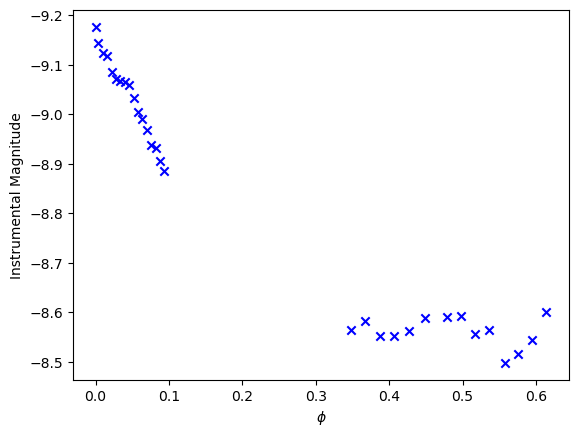

In [590]:
newdf_2023['mag'] = -2.5*np.log10(newdf_2023['correctedflux'])
plt.scatter(newdf_2023['phase'], newdf_2023['mag'], marker = 'x', color = 'blue')
plt.gca().invert_yaxis()
plt.ylabel('Instrumental Magnitude')
plt.xlabel('$\phi$')

In [591]:
newdf = newdf.append(newdf_2023)

Text(0.5, 0, '$\\phi$')

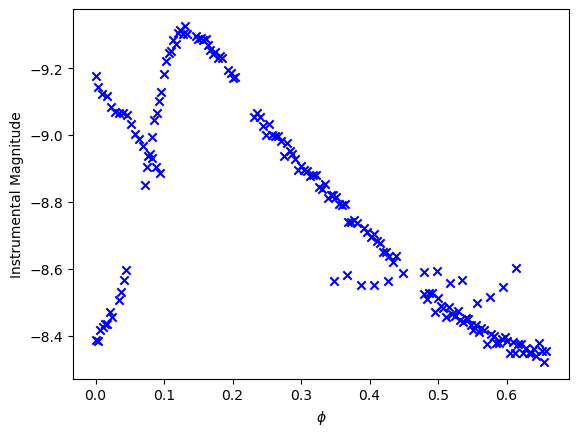

In [592]:
plt.scatter(newdf['phase'], newdf['mag'], marker = 'x', color = 'blue')
plt.gca().invert_yaxis()
plt.ylabel('Instrumental Magnitude')
plt.xlabel('$\phi$')

In [593]:
newdf['month_year'] = newdf['OBS-TIME'].dt.strftime('%B %Y')
color_dict = {'March 2022': 'red', 
              'February 2023': 'green', 
              'April 2023': 'blue'}
newdf['color'] = newdf['month_year'].map(color_dict)

Text(0.5, 0, '$\\phi$')

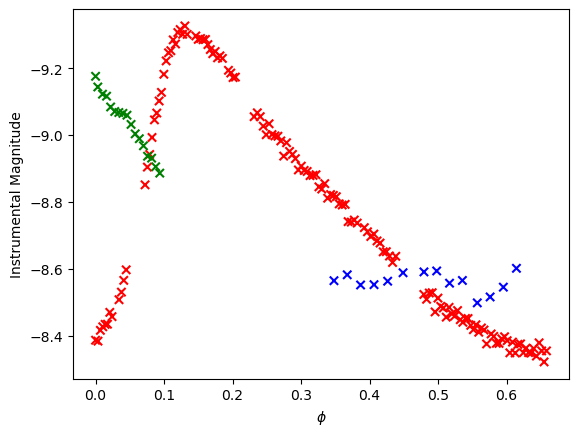

In [594]:
plt.scatter(newdf['phase'], newdf['mag'], marker = 'x', color = newdf['color'])
plt.gca().invert_yaxis()
plt.ylabel('Instrumental Magnitude')
plt.xlabel('$\phi$')

In [595]:
newdf['phaseII'] = phase(newdf['JulianDate'], period_uma)

Text(0.5, 0, '$\\phi$')

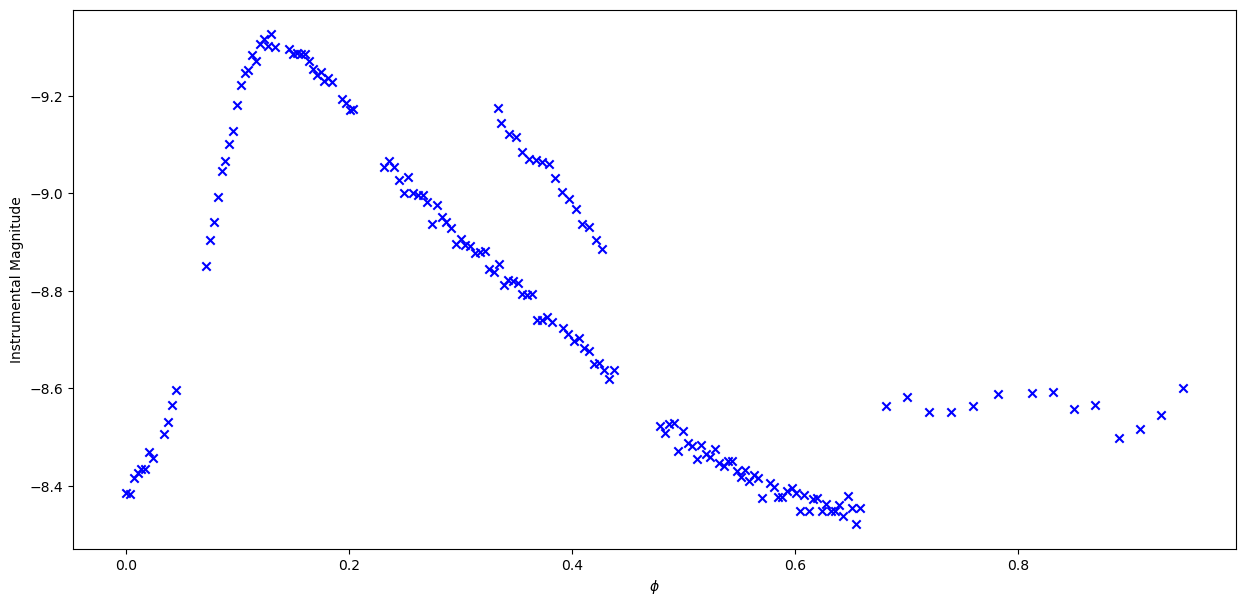

In [596]:
fig = plt.figure(figsize=(15,7))
plt.scatter(newdf['phaseII'], newdf['mag'], marker = 'x', color = 'blue')
plt.gca().invert_yaxis()
plt.ylabel('Instrumental Magnitude')
plt.xlabel('$\phi$')